In [63]:
import numpy as np 
import pandas as pd
import Bio
from Bio.pairwise2 import format_alignment
import copy
import Process_SeqLibrary_Finkelsteinlab_new as preprocess
reload(preprocess);
import plotting_Finkelsteinlab_WA as pltData
reload(pltData);
%matplotlib inline 
import matplotlib.pylab as plt 
import seaborn as sns

In [3]:
## Arguments
Cas = 'Cas9'
# Cas = 'Cas12a'
target_E_cas9 = 'GACGCATAAAGATGAGACGCTGG'
target_D_cas9 = 'GTGATAAGTGGAATGCCATGTGG'
target_D_cas12 = 'TTTAGTGATAAGTGGAATGCCATG'
target_E_cas12 = 'TTTAGACGCATAAAGATGAGACGC'
seq_colname = 'sequence'

## Target E Cas9

In [5]:
path = '../CHAMP_and_Nucleaseq_data/'
filename = 'Supplemental_File_1 (2).xlsx'
sheetname = 'sgRNA 1'
out_file_name = 'TargetE_Cas9'
data = pd.read_excel(path+filename,skiprows=1,sheetname=sheetname)
output_colnames = list(data.columns)
output_colnames.remove(seq_colname)
on_target = target_E_cas9

In [6]:
new_data = preprocess.process_Finkelstein_Library(data, on_target, seq_colname, output_colnames, 
                                                  Cas=Cas,out_file_name=out_file_name, out_path=path, 
                                                  nofilter=True, save_data=True)

### WT dABA

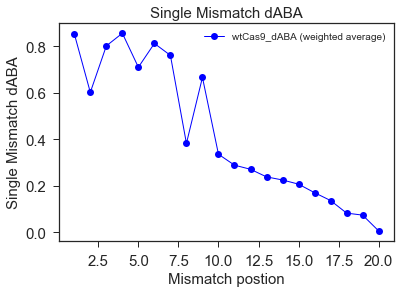

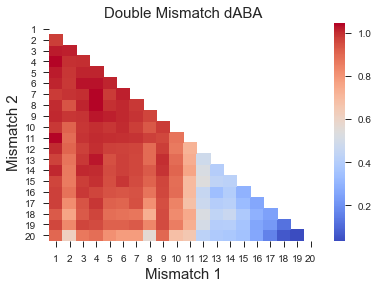

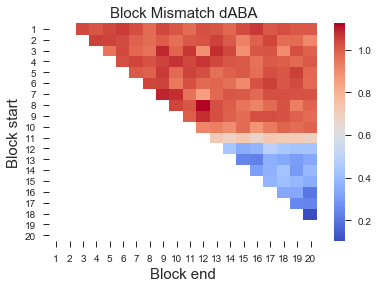

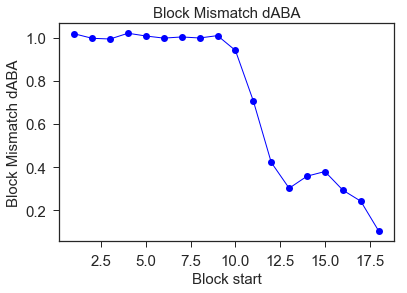

In [17]:
value_colname = 'wtCas9_dABA'
error_colname = 'wtCas9_dABA_unc'

SMM = pltData.plot_single_mut_data(new_data, data_colname=value_colname, error_colname=error_colname, Mut_type='r', data_name='Single Mismatch dABA')
DMM, DMM_df = pltData.plot_double_mut_data(new_data, data_colname=value_colname, error_colname=error_colname, Mut_type='r', data_name='Double Mismatch dABA')
BMM, BMM_df, BMM_1D = pltData.plot_block_mm_data(new_data, data_colname=value_colname, error_colname=error_colname, data_name='Block Mismatch dABA')

### WT cleavage

In [18]:
def find_log_error(x):
    x_l = x[col]-x[error_col]
    x_u = x[col]+x[error_col]
    delta_log_x_u = np.log10(x_u)-np.log10(x[col])
    if x_l>0:
        delta_log_x_l = np.log10(x[col])-np.log10(x_l)
    else:
        delta_log_x_l = 10**3
    return 0.5*(delta_log_x_l+delta_log_x_u)

In [36]:
col = 'wtCas9_cleave_rate_log'
error_col = 'wtCas9_cleave_rate_log_unc'

new_data['log10'+col] = new_data[col].apply(np.log10)
#new_data['log10'+error_col] = new_data.apply(find_log_error,axis=1)
value_colname = 'log10wtCas9_cleave_rate_log'

In [40]:
SMM = pltData.plot_single_mut_data(new_data, data_colname=value_colname, error_colname=None, Mut_type='r', data_name='Single Mismatch log(kcl)',Plot=False)

In [39]:
DMM, DMM_df = pltData.plot_double_mut_data(new_data, data_colname=value_colname, error_colname=None, Mut_type='r', data_name='Double Mismatch log(kcl)',Plot=False)


### WT cleavage (OLD)

In [42]:
file_Nuc_old = '../data_nucleaseq_Finkelsteinlab/targetE/ECas9_cleavage_rate_and_y0_full.csv'
data_Nuc_old = pd.read_csv(file_Nuc_old)
col = 'cleavage_rate'
data_Nuc_old['log10'+col] = data_Nuc_old[col].apply(np.log10)

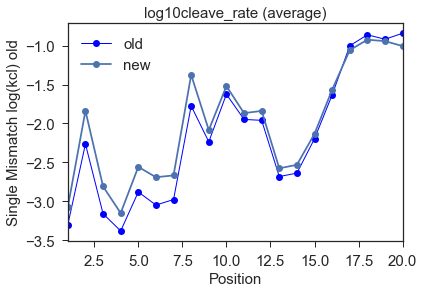

In [59]:
value_colname = 'log10cleavage_rate'

SMM_old = pltData.plot_single_mut_data(data_Nuc_old, data_colname=value_colname, error_colname=None, Mut_type='r', data_name='Single Mismatch log(kcl) old')
ax=plt.gca()
SMM.set_index('Position').plot(ax=ax,marker='o')
plt.title('log10cleave_rate (average)',fontsize=15)
plt.legend(['old', 'new'],fontsize=15);

In [67]:
DMM_old, DMM_df_old = pltData.plot_double_mut_data(data_Nuc_old, data_colname=value_colname, error_colname=None, Mut_type='r', data_name='Double Mismatch log(kcl) old',Plot=False)

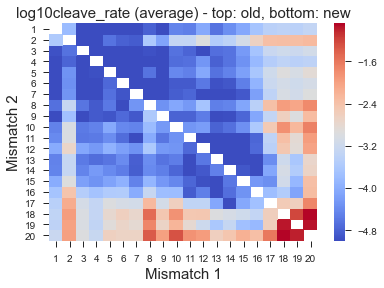

In [80]:
double_mut_df = (DMM_df_old.T.fillna(value=0) + DMM_df.fillna(value=0)).replace(to_replace=0, value=np.nan)
Mut_name = 'Mismatch'

plt.figure()
sns.heatmap(double_mut_df, cmap='coolwarm', cbar=True,vmin=-5)
plt.xlabel(Mut_name + ' 1', fontsize=15)
plt.ylabel(Mut_name + ' 2', fontsize=15)
title = 'log10cleave_rate (average) - top: old, bottom: new'
plt.title(title, fontsize=15)
